This notebook aggregates the Roclico and Saroco datasets, with the purpose of obtaining a dataset of clickbait, satire and neutral Romanian news

Load Roclico Training data

In [2]:
import os
import pandas as pd

protv_df = pd.read_json('roclico/Train/protv.json')
cancan_df = pd.read_json('roclico/Train/cancan.json')
wowbiz_df = pd.read_json('roclico/Train/wowbiz.json')

roclico_train_df = pd.concat([protv_df, cancan_df, wowbiz_df], ignore_index=True)

print(roclico_train_df)

                                                  title  \
0     Influencerița din Croația care a înnebunit Qat...   
1     Starea de sănătate a lui Bruce Willis s-a înră...   
2     Începe sezonul #7 BRD FIRST Tech Challenge Rom...   
3     O nouă idilă la „Mâncare pe care”: „Cred că se...   
4     Vedeta care și-a încărcat imagini deocheate în...   
...                                                 ...   
6801  Calendar Ortodox, Marți, 14 martie 2023. Iată ...   
6802  Fazele Lunii Martie 2023. Vezi pe ce dată apar...   
6803  Calendar Ortodox, Luni, 13 martie 2023. Zi de ...   
6804  El este Sebastian, românul dispărut pe 8 ianua...   
6805  Români implicați într-un accident grav în Unga...   

                                                content      category  
0     Data publicarii: 11 Decembrie 2022 Data actual...     clickbait  
1     Boerescu Data publicarii: 11 Decembrie 2022 Da...  nonclickbait  
2     Boerescu Data publicarii: 11 Decembrie 2022 Da...  nonclickbait  
3  

title       0
content     0
category    0
dtype: int64


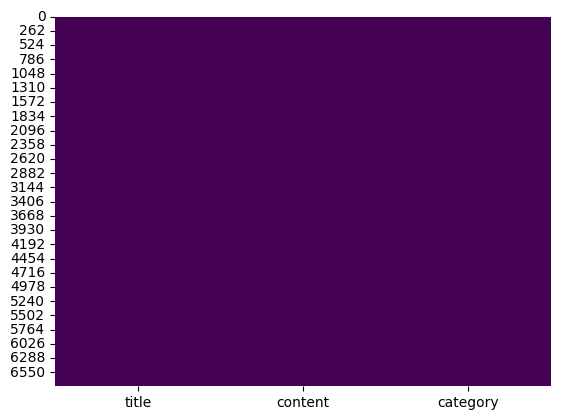

In [11]:
# Check for missing values
print(roclico_train_df.isnull().sum())

category
nonclickbait    3527
clickbait       3279
Name: count, dtype: int64


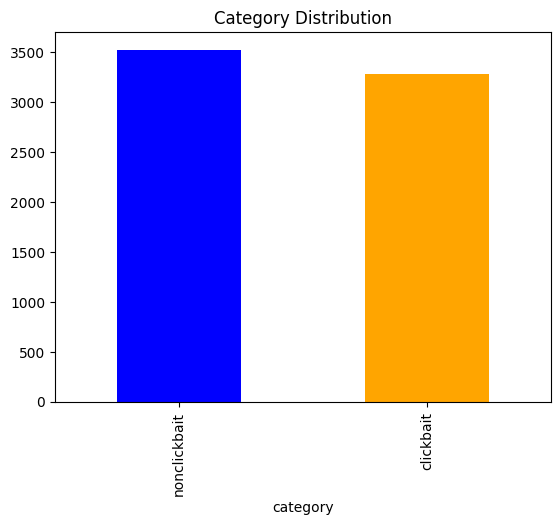

In [13]:
# Value counts of the category
print(roclico_train_df['category'].value_counts())

# Visualize the distribution
roclico_train_df['category'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Category Distribution')
plt.show()


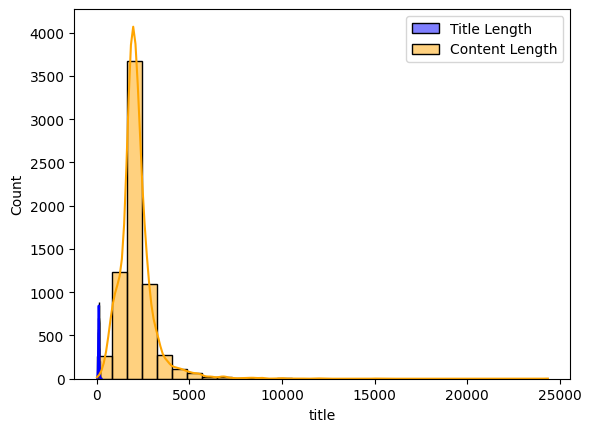

In [14]:
# Plot the distribution
sns.histplot(roclico_train_df['title'].apply(len), kde=True, color='blue', label='Title Length', bins=30)
sns.histplot(roclico_train_df['content'].apply(len), kde=True, color='orange', label='Content Length', bins=30)
plt.legend()
plt.show()


In [21]:
roclico_train_df['category'] = roclico_train_df['category'].replace({'clickbait': 1, 'nonclickbait': 0})


/tmp/ipykernel_748345/1988128019.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  roclico_train_df['category'] = roclico_train_df['category'].replace({'clickbait': 1, 'nonclickbait': 0})


In [22]:
roclico_train_df.to_csv('roclico_train_processed.csv', index=False)

In [22]:
saroco_train_df = pd.read_csv('saroco/train.csv')

In [23]:

saroco_train_df = saroco_train_df.dropna()

saroco_train_df = saroco_train_df.drop(columns=['index'])

saroco_train_df.loc[saroco_train_df['label'] == 1, 'label'] = 2

saroco_train_df.head()

,title,content,label
18000,Înotînd printre confrați,"Azi, $NE$ $NE$ ar fi fost testat zilnic de $NE...",2
18001,Confesiunile unui ucigaș în serie,Străzile $NE$ anului 1983 sînt pline de homele...,2
18002,Obrazul subțire cu tăietură se ține,Ascuțirea săbiilor drepte în prăvălia negustor...,2
18003,Comedia cu pălărioară de staniol,South $NE$ funcționează ca o teorie umoristică...,2
18004,Cum știi ce va fi și cînd habar n-ai,Știți cum e cu profețiile din presă? $NE$ că ș...,2


In [24]:
saroco_train_df.to_csv('saroco_train_processed.csv', index=False)

In [34]:
roclico_train_df = pd.read_csv('roclico_train_processed.csv')
saroco_train_df = pd.read_csv('saroco_train_processed.csv')

In [30]:
saroco_train_df.head()

,title,content,category
0,Înotînd printre confrați,"Azi, $NE$ $NE$ ar fi fost testat zilnic de $NE...",2
1,Confesiunile unui ucigaș în serie,Străzile $NE$ anului 1983 sînt pline de homele...,2
2,Obrazul subțire cu tăietură se ține,Ascuțirea săbiilor drepte în prăvălia negustor...,2
3,Comedia cu pălărioară de staniol,South $NE$ funcționează ca o teorie umoristică...,2
4,Cum știi ce va fi și cînd habar n-ai,Știți cum e cu profețiile din presă? $NE$ că ș...,2


In [35]:
train_merged = pd.concat([saroco_train_df, roclico_train_df], ignore_index=True)

train_merged = train_merged.sample(frac=1, random_state=42).reset_index(drop=True)

train_merged.head()

,title,content,category
0,Mîrlănia e noul umor negru,Primul $NE$ $NE$ a fost la vremea lui un film ...,2
1,Veste bună pentru șoferi! Cum poți scăpa de pl...,O anumită categorie de șoferi a primit o veste...,1
2,"VIDEO Florin Petre, tatăl care a refuzat să mo...",Data: 09 Noiembrie 2022 Toți oamenii vor să tr...,0
3,Pe ce dată este sărbătorit Sfântul Daniel 2022...,Vezi pe ce dată este prăznuit Sfântul Daniel 2...,1
4,"Citit, plăcut, poate vom reveni","E.A. Poe, $NE$ $NE$ $NE$ şi alte povestiri, $...",2


In [36]:
train_merged.to_csv('train_merged.csv', index=False)

Test Aggregation